<p style="font-size: 30px; font-weight: bold; text-align: center;">TP N°1 Machine Learning</p>


<div style="text-align: center;">
  <img src="https://media-exp1.licdn.com/dms/image/C4D0BAQHrgk0foyuJvw/company-logo_200_200/0/1559125976448?e=2159024400&v=beta&t=NtJQpfX1B73q4yoE8sy2dBTXfaGAPdmtVeu3JVe2Nf8" alt="Image 1">
</div>


<p style="font-size: 30px; font-weight: bold; text-align: center;">ADAM ALASSANE IBRAHIM</p>


<div style="text-align: center;">
  <img src="https://th.bing.com/th/id/R.16ab4044345f246d889c91c4d099357e?rik=6bdWkUd5M9qGOQ&pid=ImgRaw&r=0" alt="Image 1">
</div>



  <span style="font-size: 18px; font-weight: normal; line-height: 1.6; text-align: center; font-weight: bold;color: #333; margin-bottom: 20px;">
    Sous la supervision de<br>
    Mme. Mously Diaw<br>
    Data Scientist / ML Engineer<br>
    Auto-entrepreneur
  </span>


Lors du TP fait en salle, nous avons effectué un travail qui consiste à prédire le margin_low (marge inférieure) des billets. Après la mise en œuvre du modèle de régression linéaire, nous avons détecté une multicolinéarité entre les variables explicatives du modèle. Ce qui a pour conséquence d'entrainer une grande variabilité des coefficients issus de la régression,  voire même souvent un surapprentissage du modèle. Et donc une faible performance du modèle. C'est justement pour lutter contre ces variabilités des coefficients que sont mis en œuvre les modèles régularisés. La régularisation consiste à augmenter un facteur au modèle initial qui va à la fois contrôler l'erreur sur le jeu d'entrainement et la complexité du modèle. Ce facteur est le produit du régularisateur, qui est fonction des coefficients, et du coefficient de régularisation. Ce dernier s'appelle aussi **hyperparamètre**.

La recherche de cet hyperparamètre pour les modèles de Ridge, lasso et Elastic Net constitue la principale problématique de ce travail. La régression de ridge utilise la norme l² du vecteur de poids des coefficents. Cette méthode nécessite au préalable la standardisation des données. La régression de Lasso quant à elle utilise la norme l1 au lieu de la norme l2. Enfin, la régression Elastic Net n'est qu'une combinaison des deux modèles.


Dans cet exercice, il sera d'abord question d'analyser les variables explicatives tout en se penchant sur le jeu de train et le jeu de test pour le modèle Elastic Net fait en salle. Ensuite, la deuxième partie portera sur l'optimisation de l'hyperparamètre des  modèles Ridge, Lasso et ElasticNet. Pour ce faire, nous allons admettre les résultats trouvés dans le TP1, c'est-à-dire les résultats obtenus à partir des modèles mis en œuvre. Il est aussi important de préciser que notre travail s'effectuera sur le jeu de donées issue de l'EDA (data_model) faite en salle. Nous l'avons d'abord exporté sur le github sous format csv pour ensuite le récupérer dans ce notebook. 

In [133]:
# Librairies 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn import linear_model
import statsmodels.formula.api as smf
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from statsmodels.stats.diagnostic import het_white , normal_ad

In [ ]:
# importation de la base de données 
url = 'https://raw.githubusercontent.com/ADAMALASSANEIBRAHIM/TP_ML_Engineer/refs/heads/main/data_model.csv'
data = pd.read_csv(url, delimiter=',')
print(data.head())

In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1463 entries, 0 to 1462
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1463 non-null   int64  
 1   is_genuine    1463 non-null   bool   
 2   diagonal      1463 non-null   float64
 3   height_left   1463 non-null   float64
 4   height_right  1463 non-null   float64
 5   margin_low    1463 non-null   float64
 6   margin_up     1463 non-null   float64
 7   length        1463 non-null   float64
dtypes: bool(1), float64(6), int64(1)
memory usage: 81.6 KB


In [106]:
# Création des variables explicatives et cible:
# X est la liste des variables explicatives et y est la variable cible
X = data.loc[:, ["diagonal", "height_left", "height_right", "margin_up", "length"]]  
y = data.loc[:, 'margin_low']

In [107]:
X.head()

,diagonal,height_left,height_right,margin_up,length
0,171.81,104.86,104.95,2.89,112.83
1,171.46,103.36,103.66,2.99,113.09
2,172.69,104.48,103.50,2.94,113.16
3,171.36,103.91,103.94,3.01,113.51
4,171.73,104.28,103.46,3.48,112.54


In [108]:
y.head()

0    4.52
1    3.77
2    4.40
3    3.62
4    4.04
Name: margin_low, dtype: float64

## **Train / Test split**

Nous allons séparer notre jeu de données en deux: une en un jeu de données de train (qui servira à l'netrainement du(des) modèle(s) et l'autre partie en jeu de données de test. Le tirage des deux jeux de données se fait de façon aléatoire. Cependant, pour s'assurer de la réproductibilité du travail, nous allons laisser la graine, comme lors des TP, à 42. 

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(f"Train set - X: {X_train.shape} ; y: {y_train.shape} \nTest set - X: {X_test.shape} ; y: {y_test.shape}")

Train set - X: (1024, 5) ; y: (1024,) 
Test set - X: (439, 5) ; y: (439,)


In [110]:
std_scaler = StandardScaler().fit(X_train)  # Standardize features by removing the mean and scaling to unit variance.
X_train_std = std_scaler.transform(X_train)
X_test_std = std_scaler.transform(X_test)

# **Résultasts obtenus lors du TP**

In [111]:
# On crée un modèle de régression linéaire
ridge = linear_model.Ridge(alpha=1.)

# On entraîne ce modèle sur les données d'entrainement
ridge.fit(X_train, y_train)

# On récupère l'erreur de norme 2 sur le jeu de données test
#ridge_error = np.mean((ridge.predict(X_test) - y_test) ** 2)
mse_r = metrics.mean_squared_error(ridge.predict(X_test), y_test)
rmse_r = np.sqrt(mse_r)  # metrics.mean_squared_error(ridge.predict(X_test), y_test, squared=False)
mae_r = metrics.mean_absolute_error(ridge.predict(X_test), y_test)
max_error_r = metrics.mean_absolute_error(ridge.predict(X_test), y_test)
mse_r, rmse_r, mae_r, max_error_r

#print("MSE_Ridge :",ridge_error)# Le MSE est presque le même

(0.2162136226425013,
 0.46498776612132636,
 0.35629319455565117,
 0.35629319455565117)

In [112]:
# Définition d'une fonction
def train_model(model, x_train, y_train, x_test, y_test):
    # On entraîne ce modèle sur les données d'entrainement
    model.fit(x_train, y_train)
    
    # On récupère l'erreur de norme 2 sur le jeu de données train
    error_train = np.mean((model.predict(x_train) - y_train) ** 2)

    # On récupère l'erreur de norme 2 sur le jeu de données test
    error_test = np.mean((model.predict(x_test) - y_test) ** 2)

    # On obtient l'erreur quadratique ci-dessous
    print(f"Model error: {round(error_test, 5)}")
    return {"estimator": model, "error_train": error_train, "error_test": error_test}

### Ridge

In [113]:
# Train and evaluate ridge regression
ridge_error = train_model(model=linear_model.Ridge(alpha=1.),
                          x_train=X_train, y_train=y_train,
                          x_test=X_test, y_test=y_test)

Model error: 0.21621


### Lasso

In [114]:
# Train and evaluate Lasso regression
lasso_error_mse = train_model(model=linear_model.Lasso(fit_intercept=True, alpha=1.,),
                          x_train=X_train, y_train=y_train,
                          x_test=X_test, y_test=y_test)

Model error: 0.42698


### Elastic Net

In [115]:
# Train and evaluate Elastic Net regression
elastic_error_mse = train_model(model=linear_model.ElasticNet(fit_intercept=True, alpha=1., l1_ratio=.5),
                            x_train=X_train_std, y_train=y_train,
                            x_test=X_test, y_test=y_test)

Model error: 0.42698


C:\Users\DELL\Anaconda_W\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but ElasticNet was fitted without feature names
  warnings.warn(


**Sur la base du MSE, on constate que la régression proposée par Ridge est plus performante.**

# **Analyse des variables explicatives**

In [102]:
# Définition d'une fonction
def train_model1(model, x_train, y_train, x_test, y_test):
    # Entraînement du modèle sur les données d'entraînement
    model.fit(x_train, y_train)
    
    # Prédictions pour les données d'entraînement et de test
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    # Calcul des métriques
    error_train = mean_squared_error(y_train, y_train_pred)
    error_test = mean_squared_error(y_test, y_test_pred)
    rmse_train = np.sqrt(error_train)
    rmse_test = np.sqrt(error_test)
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)

    # Affichage des erreurs et des métriques
    print(f"Training error (MSE): {round(error_train, 5)}")
    print(f"Test error (MSE): {round(error_test, 5)}")
    print(f"Training RMSE: {round(rmse_train, 5)}")
    print(f"Test RMSE: {round(rmse_test, 5)}")
    print(f"Training R²: {round(r2_train, 5)}")
    print(f"Test R²: {round(r2_test, 5)}")
    # Extraction et analyse des coefficients
    coefficients = pd.DataFrame({
    "Variable": x_train.columns if isinstance(x_train, pd.DataFrame) else [f"Variable_{i}" for i in range(x_train.shape[1])],
    "Coefficient": model.coef_,
    "Importance (%)": 100 * abs(model.coef_) / sum(abs(model.coef_))
}).sort_values(by="Importance (%)", ascending=False)

    
   
    # Affichage des coefficients dans un joli tableau
    print("\nAnalyse des variables explicatives :")
    from IPython.display import display  # pour un affichage plus clair dans Jupyter
    display(coefficients.style.set_caption("Tableau des Coefficients et Importance des Variables"))

    print(f"\nOrdonnée à l'origine : {model.intercept_:.4f}")

    # Retourner un dictionnaire avec le modèle, les erreurs et les métriques pour référence
    return {
        "estimator": model,
        "error_train": error_train,
        "error_test": error_test,
        "rmse_train": rmse_train,
        "rmse_test": rmse_test,
        "r2_train": r2_train,
        "r2_test": r2_test,
        "coefficients": coefficients
    }

In [118]:
# Train and evaluate ridge regression
ridge_error = train_model1(model=linear_model.Ridge(alpha=1.),
                          x_train=X_train, y_train=y_train,
                          x_test=X_test, y_test=y_test)

Training error (MSE): 0.23626
Test error (MSE): 0.21621
Training RMSE: 0.48606
Test RMSE: 0.46499
Training R²: 0.47037
Test R²: 0.4936

Analyse des variables explicatives :


,Variable,Coefficient,Importance (%)
4,length,-0.405522,33.514534
3,margin_up,0.282955,23.384957
2,height_right,0.258713,21.381431
1,height_left,0.175752,14.525076
0,diagonal,-0.087047,7.194002



Ordonnée à l'origine : 19.0824


In [119]:
lasso_error_mse = train_model1(model=linear_model.Lasso(fit_intercept=True, alpha=1.,),
                          x_train=X_train, y_train=y_train,
                          x_test=X_test, y_test=y_test)

Training error (MSE): 0.44608
Test error (MSE): 0.42698
Training RMSE: 0.66789
Test RMSE: 0.65344
Training R²: 0.0
Test R²: -4e-05

Analyse des variables explicatives :


C:\Users\DELL\AppData\Local\Temp\ipykernel_9840\1401912794.py:29: RuntimeWarning: invalid value encountered in divide
  "Importance (%)": 100 * abs(model.coef_) / sum(abs(model.coef_))


,Variable,Coefficient,Importance (%)
0,diagonal,-0.000000,nan
1,height_left,0.000000,nan
2,height_right,0.000000,nan
3,margin_up,0.000000,nan
4,length,-0.000000,nan



Ordonnée à l'origine : 4.4848


In [121]:
# Train and evaluate ridge regression
elastic_net= train_model1(model=linear_model.ElasticNet(fit_intercept=True, alpha=1., l1_ratio=.5),
                            x_train=X_train_std, y_train=y_train,
                            x_test=X_test, y_test=y_test)

Training error (MSE): 0.44608
Test error (MSE): 0.42698
Training RMSE: 0.66789
Test RMSE: 0.65344
Training R²: 0.0
Test R²: -4e-05

Analyse des variables explicatives :


C:\Users\DELL\Anaconda_W\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but ElasticNet was fitted without feature names
  warnings.warn(
C:\Users\DELL\AppData\Local\Temp\ipykernel_9840\1401912794.py:29: RuntimeWarning: invalid value encountered in divide
  "Importance (%)": 100 * abs(model.coef_) / sum(abs(model.coef_))


,Variable,Coefficient,Importance (%)
0,Variable_0,-0.000000,nan
1,Variable_1,0.000000,nan
2,Variable_2,0.000000,nan
3,Variable_3,0.000000,nan
4,Variable_4,-0.000000,nan



Ordonnée à l'origine : 4.4848


## **Commentaire**
Dans un premier temps, nous remarquons que par rapport aux métriques MSE et RMSE, le modèle n'a pas surappris. Et ce en dépit du fait qu'il est moins performant, toujours par rapport aux mêmes métriques, que le modèle de ridge. Il est deux fois meilleurs. 

Ensuite, nous constatons que tous les coefficients des variables sont ramenés à 0. Ce qui laisse entendre une multicolinéarité entre les variables. En effet, ce résultat, qui est similaire à celui de Lasso n'a rien d'étonnant, car mettre en oevre un modèle Elastic Net avec alpha= 1 revient à appliquer un modèle de régression de Lasso. De même la façon, un modèle régression Elastic Net avec alpha = 0 revient à faire la régression ridge. Donc en commentant les résultats de ce modèle, nous commentons aussi les résultats de Lasso. Cela s'explique par le fait que le modèle Elastic Net est obtenu en combinant les deux modèles. 

On sait que la régression Lasso  est un modèle de réduction de dimmension supervisé, i.e. "les variables qui ne sont pas nécessaires à la prédiction de l'étiquette sont éliminées" (Cours de Machine Learning de Mme. Mously, Diaw Data Scientist / ML Engineer, Auto-entrepreneur). cela signifie que le modèle a appliqué une régularisation si forte qu'il n'a pas trouvé de variable pertinente à conserver. Le modèle doit donc être *jeté à la poubelle* selon ces résultas.
Pour éviter cela, il recommander de:
* réduire le régularisateur;
* standardiser les données si ce n'est pas fait;
* faire des transformations qui réduiraient la corrélation entre les variables explicaticatives et la variable cible. Autrement dit, revoir l'EDA.

#  **Optimiser les modèles Ridge, Lasso et ElasticNet**

## **Standardisation**

Nous savons qu'il y a plusieurs façons de standardiser les données (Standardscaler, Minmaxscaler, etc). Nous savons aussi, comme il a été annoncé dans l'introduction que pour faire de la régression ridge, qu'il faut nécessairement standardiser les données. Il est alors normal de se poser la question sur la meilleure statndardisation à faire. 

Une fois qu'on a trouvé la meilleure façon de standardiser les données, nous procéderons à la recherche de l'**hyperparamètre** alpha qui optimiserait la performance du modèle obtenu via la régression ridge.

In [51]:
# Pipeline et types de standardisation avec validation croisée
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, QuantileTransformer, PowerTransformer
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
import numpy as np

# Définir les différents scalers
scalers = {
    'StandardScaler': StandardScaler(),
    'MinMaxScaler': MinMaxScaler(),
    'RobustScaler': RobustScaler(),
    'QuantileTransformer': QuantileTransformer(output_distribution='uniform'),
    'PowerTransformer': PowerTransformer()
}
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Liste pour stocker les résultats
results_list = []

for scaler_name, scaler in scalers.items():
    # Créer le pipeline avec le scaler et le modèle Ridge
    pipeline = Pipeline([
        ('scaler', scaler),
        ('ridge', Ridge(alpha = 1.))
    ])
    
    # Obtenir les prédictions de validation croisée
    y_pred = cross_val_predict(pipeline, X_train, y_train, cv=10)
    
    # Calculer les métriques
    mse = mean_squared_error(y_train, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_train, y_pred)
    
    # Ajouter les résultats dans la liste
    results_list.append({
        'Scaler': scaler_name,
        'MSE': mse,
        'RMSE': rmse,
        'R²': r2
    })

# Conversion en DataFrame pour un affichage clair
results_df = pd.DataFrame(results_list)
print(results_df)


C:\Users\DELL\Anaconda_W\Lib\site-packages\sklearn\preprocessing\_data.py:2762: UserWarning: n_quantiles (1000) is greater than the total number of samples (921). n_quantiles is set to n_samples.
  warnings.warn(
C:\Users\DELL\Anaconda_W\Lib\site-packages\sklearn\preprocessing\_data.py:2762: UserWarning: n_quantiles (1000) is greater than the total number of samples (921). n_quantiles is set to n_samples.
  warnings.warn(
C:\Users\DELL\Anaconda_W\Lib\site-packages\sklearn\preprocessing\_data.py:2762: UserWarning: n_quantiles (1000) is greater than the total number of samples (921). n_quantiles is set to n_samples.
  warnings.warn(
C:\Users\DELL\Anaconda_W\Lib\site-packages\sklearn\preprocessing\_data.py:2762: UserWarning: n_quantiles (1000) is greater than the total number of samples (921). n_quantiles is set to n_samples.
  warnings.warn(
C:\Users\DELL\Anaconda_W\Lib\site-packages\sklearn\preprocessing\_data.py:2762: UserWarning: n_quantiles (1000) is greater than the total number of 

                Scaler       MSE      RMSE        R²
0       StandardScaler  0.239631  0.489522  0.462804
1         MinMaxScaler  0.239566  0.489455  0.462950
2         RobustScaler  0.239625  0.489516  0.462817
3  QuantileTransformer  0.255450  0.505421  0.427342
4     PowerTransformer  0.248640  0.498638  0.442609


C:\Users\DELL\Anaconda_W\Lib\site-packages\numpy\core\_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\Users\DELL\Anaconda_W\Lib\site-packages\numpy\core\_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\Users\DELL\Anaconda_W\Lib\site-packages\numpy\core\_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


Nous allons d'office abandonner QuantileTransformer et PowerTransformer, car offrant tous les deux des MSE relativement élevées et un R² faible. Même si, les trois autres scalers sont relativement opter pour le MinmaxScaler, car il dispose R² très legèrement supérieur. Nous reconnaissons volontiers que nous aurions dû les autres, et cela n'aurait rien changer de significatif. 
A présent nous mettons le cap sur la recherche des régularisateurs optimaux. Comme nous n'avons aucune idée, on peut un échantillon aléatoire de taille = 50 qui suit une distribution uniforme U[0,10]. Il est important de préciser que nous devons cette façon de faire à M.**Nitesh Yadav**.

Nous allons utiliser un échantillon aléatoire dans un premier temps pour avoir une idée de la valeur de l'hyperparamètre? Puis, dans un deuxième temps, nous affinerons notre recherche. Cette façon de faire a l'avantage d'être exhaustive et concise, et sans perdre beaucoup de temps. 

In [53]:
# Définir une plage commune de valeurs pour l'hyperparamètre alpha
# un échantillon aléatoire de taille = 100 qui suit une distribution uniforme U[0,10]
# Fixer la graine aléatoire
np.random.seed(42)
alpha_values = np.random.uniform(0, 10, 50)

# Définir les pipelines pour chaque modèle de régression
ridge_pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('ridge', Ridge())
])

lasso_pipeline = Pipeline([
    ('lasso', Lasso())
])

elastic_net_pipeline = Pipeline([
    ('elasticnet', ElasticNet())
])

# Créer les grilles de paramètres pour chaque modèle
param_grid_ridge = {'ridge__alpha': alpha_values}
param_grid_lasso = {'lasso__alpha': alpha_values}
param_grid_elastic_net = {'elasticnet__alpha': alpha_values}

# Configurer GridSearchCV pour chaque modèle avec validation croisée à 10 plis
ridge_search = GridSearchCV(ridge_pipeline, param_grid=param_grid_ridge, cv=10)
lasso_search = GridSearchCV(lasso_pipeline, param_grid=param_grid_lasso, cv=10)
elastic_net_search = GridSearchCV(elastic_net_pipeline, param_grid=param_grid_elastic_net, cv=10)

# Entraînement de chaque modèle pour trouver le meilleur alpha
ridge_search.fit(X_train, y_train)
lasso_search.fit(X_train, y_train)
elastic_net_search.fit(X_train, y_train)

# Afficher les meilleurs alpha pour chaque modèle
print("Meilleur alpha pour Ridge:", ridge_search.best_params_['ridge__alpha'])
print("Meilleur alpha pour Lasso:", lasso_search.best_params_['lasso__alpha'])
print("Meilleur alpha pour Elastic Net:", elastic_net_search.best_params_['elasticnet__alpha'])


Meilleur alpha pour Ridge: 0.6505159298527952
Meilleur alpha pour Lasso: 0.20584494295802447
Meilleur alpha pour Elastic Net: 0.20584494295802447


### Analyse de l'échantillon 

Les questions qu'on se pose à ce niveau est de savoir:
*Quelles sont les valeurs qui encadrent les hyperparamètres?*
Cependant je continue de m'interroger sur l'optimalité de ces valeurs. D'ailleurs une idée à ce propos, ne serait-il pas mieux d'observer de près l'échantillon afin de trouver un encadrement de ces valeurs. Et cela est possible puisqu'on a fixé la graine.

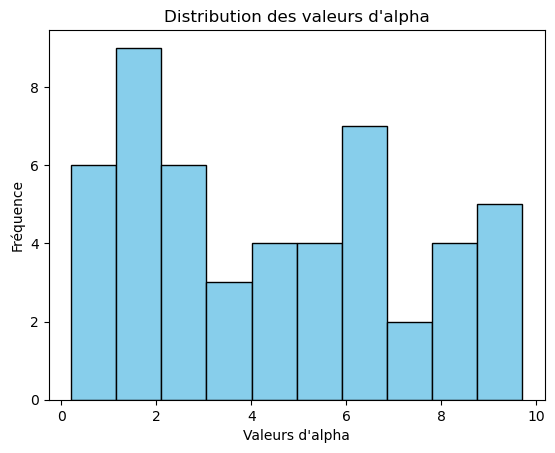

Moyenne: 4.4592390439226115
Écart-type: 2.859797785370301
Min: 0.20584494295802447, 25% Quartile: 1.8376699627145712, Médiane: 4.360487561908585, 75% Quartile: 6.498549369460814, Max: 9.699098521619943


In [62]:
import matplotlib.pyplot as plt  # Importation correcte de pyplot

# Visualiser la distribution des valeurs d'alpha
plt.hist(alpha_values, bins=10, color='skyblue', edgecolor='black')
plt.xlabel("Valeurs d'alpha")
plt.ylabel("Fréquence")
plt.title("Distribution des valeurs d'alpha")
plt.show()

# Calculer les statistiques descriptives
alpha_mean = np.mean(alpha_values)
alpha_std = np.std(alpha_values)
alpha_min = np.min(alpha_values)
alpha_max = np.max(alpha_values)
alpha_quartiles = np.percentile(alpha_values, [25, 50, 75])

print(f"Moyenne: {alpha_mean}")
print(f"Écart-type: {alpha_std}")
print(f"Min: {alpha_min}, 25% Quartile: {alpha_quartiles[0]}, Médiane: {alpha_quartiles[1]}, 75% Quartile: {alpha_quartiles[2]}, Max: {alpha_max}")


On peut remarquer que la valeur optimale pour Lasso et Elastic Net est le minimum de l'échantillon.

In [67]:
# Nouveaux intervalles restreints
np.random.seed(42)
ridge_alpha_range = np.linspace(1, 2, 50)  # Plage resserrée autour de 9-11 pour Ridge
lasso_elastic_alpha_range = np.linspace(-2, 1, 50)  # Plage resserrée 0-1 pour Lasso et Elastic Net

# Configurer les recherches par grille avec les nouvelles plages
ridge_search = GridSearchCV(
    Pipeline([('scaler', MinMaxScaler()), ('ridge', Ridge())]),
    {'ridge__alpha': ridge_alpha_range},
    cv=10
)

lasso_search = GridSearchCV(
    Pipeline([('lasso', Lasso())]),
    {'lasso__alpha': lasso_elastic_alpha_range},
    cv=10
)

elastic_net_search = GridSearchCV(
    Pipeline([ ('elasticnet', ElasticNet())]) ,
    {'elasticnet__alpha': lasso_elastic_alpha_range},
    cv=10
)

# Entraînement avec les nouvelles plages optimisées
ridge_search.fit(X_train, y_train)
lasso_search.fit(X_train, y_train)
elastic_net_search.fit(X_train, y_train)

# Affichage des meilleurs alpha
print("Meilleur alpha optimisé pour Ridge:", ridge_search.best_params_['ridge__alpha'])
print("Meilleur alpha optimisé pour Lasso:", lasso_search.best_params_['lasso__alpha'])
print("Meilleur alpha optimisé pour Elastic Net:", elastic_net_search.best_params_['elasticnet__alpha'])


C:\Users\DELL\Anaconda_W\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
330 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\DELL\Anaconda_W\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DELL\Anaconda_W\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\DELL\Anaconda_W\Lib\site-packages\sklearn\pipeline.py", line 475, in fit
    self._final_estimator.f

Meilleur alpha optimisé pour Ridge: 1.0
Meilleur alpha optimisé pour Lasso: 0.020408163265305923
Meilleur alpha optimisé pour Elastic Net: 0.020408163265305923


C:\Users\DELL\Anaconda_W\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
330 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\DELL\Anaconda_W\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DELL\Anaconda_W\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\DELL\Anaconda_W\Lib\site-packages\sklearn\pipeline.py", line 475, in fit
    self._final_estimator.f

In [72]:
# Nouveaux intervalles restreints
np.random.seed(42)
ridge_alpha_range = np.linspace(11, 12, 20)  # Plage resserrée autour de 9-11 pour Ridge
lasso_elastic_alpha_range = np.linspace(0, 0.1, 20)  # Plage resserrée 0-1 pour Lasso et Elastic Net

# Configurer les recherches par grille avec les nouvelles plages
ridge_search = GridSearchCV(
    Pipeline([('scaler', StandardScaler()), ('ridge', Ridge())]),
    {'ridge__alpha': ridge_alpha_range},
    cv=10
)

lasso_search = GridSearchCV(
    Pipeline( [('lasso', Lasso())]),
    {'lasso__alpha': lasso_elastic_alpha_range},
    cv=10
)

elastic_net_search = GridSearchCV(
    Pipeline( [('elasticnet', ElasticNet())]),
    {'elasticnet__alpha': lasso_elastic_alpha_range},
    cv=10
)

# Entraînement avec les nouvelles plages optimisées
ridge_search.fit(X_train, y_train)
lasso_search.fit(X_train, y_train)
elastic_net_search.fit(X_train, y_train)

# Affichage des meilleurs alpha
print("Meilleur alpha optimisé pour Ridge:", ridge_search.best_params_['ridge__alpha'])
print("Meilleur alpha optimisé pour Lasso:", lasso_search.best_params_['lasso__alpha'])
print("Meilleur alpha optimisé pour Elastic Net:", elastic_net_search.best_params_['elasticnet__alpha'])


C:\Users\DELL\Anaconda_W\Lib\site-packages\sklearn\base.py:1474: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\Users\DELL\Anaconda_W\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\DELL\Anaconda_W\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.041e+02, tolerance: 4.061e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinat

Meilleur alpha optimisé pour Ridge: 11.526315789473685
Meilleur alpha optimisé pour Lasso: 0.0
Meilleur alpha optimisé pour Elastic Net: 0.0


C:\Users\DELL\Anaconda_W\Lib\site-packages\sklearn\base.py:1474: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\Users\DELL\Anaconda_W\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\DELL\Anaconda_W\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.210e+02, tolerance: 4.568e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinat

Nous constatons que la valeur de l'hyperparatre alpha depend de la façon dont nous avons standardisé les données. 
On va comparer les modèles et décider de la valeur qu'il faut retenir. 

In [127]:
# Initialisation des modèles avec les meilleurs hyperparamètres
ridge_model2 = Ridge(alpha=11.526315789473685)
lasso_model2 = Lasso(alpha=0.0)
elastic_net_model2 = ElasticNet(alpha=0.0)
ridge_model1 = Ridge(alpha=11.526315789473685)
lasso_model1 = Lasso(alpha=0.020408163265305923)
elastic_net_model1 = ElasticNet(alpha=0.020408163265305923)

In [130]:
# Entraînement des modèles
ridge_model2.fit(X_train_standard, y_train)  # Entraînement de Ridge avec StandardScaler
lasso_model2.fit(X_train_standard, y_train)  # Entraînement de Lasso avec aucune normalisation
elastic_net_model2.fit(X_train_standard, y_train)  # Entraînement de ElasticNet avec aucune normalisation
ridge_model1.fit(X_train_minmax, y_train)  # Entraînement de Ridge avec MinMaxScaler
lasso_model1.fit(X_train_minmax, y_train)  # Entraînement de Lasso avec aucune normalisation
elastic_net_model1.fit(X_train_minmax, y_train)  # Entraînement de ElasticNet avec aucune normalisation


C:\Users\DELL\Anaconda_W\Lib\site-packages\sklearn\base.py:1474: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\Users\DELL\Anaconda_W\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\DELL\Anaconda_W\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.210e+02, tolerance: 4.568e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinat

ElasticNet(alpha=0.020408163265305923)

In [132]:
# Fonction d'évaluation des modèles avec les métriques et coefficients
def evaluate_model(model, X_test, y_test, scaler_name, feature_names, model_name):
    # Prédictions
    y_pred = model.predict(X_test)
    
    # Calcul des métriques
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse**0.5
    
    # Coefficients des variables
    coefficients = model.coef_
    
    # Créer une série avec les coefficients et les nommer selon les features
    coefficients_dict = {f"Coef_{name}": coef for name, coef in zip(feature_names, coefficients)}
    
    # Retourner les résultats dans un DataFrame avec les coefficients dans des colonnes séparées
    results = pd.Series([model_name, scaler_name, r2, mse, rmse] + list(coefficients_dict.values()), 
                        index=["Model", "Scaler", "R²", "MSE", "RMSE"] + list(coefficients_dict.keys()))
    
    return results

# Exemple de noms de variables (features), à adapter à ton jeu de données
feature_names = X_train.columns.tolist()  # Utilisation des noms des colonnes de X_train comme features

# Initialisation d'un DataFrame vide pour stocker les résultats
results_df = pd.DataFrame(columns=["Model", "Scaler", "R²", "MSE", "RMSE"] + [f"Coef_{name}" for name in feature_names])

# Évaluation des modèles avec les hyperparamètres optimisés et ajout des résultats
result_ridge2 = evaluate_model(ridge_model2, X_test_standard, y_test, 'StandardScaler', feature_names, 'Ridge_alpha_11')
result_lasso2 = evaluate_model(lasso_model2, X_test, y_test, 'None', feature_names, 'Lasso_alpha_0')  # Lasso avec alpha=0
result_elastic_net2 = evaluate_model(elastic_net_model2, X_test, y_test, 'None', feature_names, 'ElasticNet_alpha_0')  # ElasticNet avec alpha=0
result_ridge1 = evaluate_model(ridge_model1, X_test_minmax, y_test, 'MinMaxScaler', feature_names, 'Ridge_alpha_11')
result_lasso1 = evaluate_model(lasso_model1, X_test, y_test, 'None', feature_names, 'Lasso_alpha_0.0204')  # Lasso avec alpha=0.0204
result_elastic_net1 = evaluate_model(elastic_net_model1, X_test, y_test, 'None', feature_names, 'ElasticNet_alpha_0.0204')  # ElasticNet avec alpha=0.0204

# Utilisation de pd.concat pour ajouter les résultats au DataFrame
results_df = pd.concat([results_df, result_ridge2.to_frame().T], ignore_index=True)
results_df = pd.concat([results_df, result_lasso2.to_frame().T], ignore_index=True)
results_df = pd.concat([results_df, result_elastic_net2.to_frame().T], ignore_index=True)
results_df = pd.concat([results_df, result_ridge1.to_frame().T], ignore_index=True)
results_df = pd.concat([results_df, result_lasso1.to_frame().T], ignore_index=True)
results_df = pd.concat([results_df, result_elastic_net1.to_frame().T], ignore_index=True)

# Afficher les résultats
results_df


C:\Users\DELL\Anaconda_W\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(
C:\Users\DELL\Anaconda_W\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but ElasticNet was fitted without feature names
  warnings.warn(
C:\Users\DELL\Anaconda_W\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(
C:\Users\DELL\Anaconda_W\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but ElasticNet was fitted without feature names
  warnings.warn(


,Model,Scaler,R²,MSE,RMSE,Coef_diagonal,Coef_height_left,Coef_height_right,Coef_margin_up,Coef_length
0,Ridge_alpha_11,StandardScaler,0.493292,0.216347,0.465131,-0.026463,0.053563,0.085419,0.068253,-0.348173
1,Lasso_alpha_0,None,-2079.963836,888.498718,29.807696,-0.026455,0.053042,0.085015,0.066521,-0.353345
2,ElasticNet_alpha_0,None,-2079.963836,888.498718,29.807696,-0.026455,0.053042,0.085015,0.066521,-0.353345
3,Ridge_alpha_11,MinMaxScaler,0.476757,0.223406,0.472659,-0.139153,0.319943,0.484042,0.470011,-1.353954
4,Lasso_alpha_0.0204,None,-84226.293974,35962.106325,189.636775,-0.0,0.0,0.0,0.0,-1.692352
5,ElasticNet_alpha_0.0204,None,-24220.588372,10341.770408,101.694495,-0.0,0.157368,0.290937,0.315203,-1.329044


>Sur la base des données du tableau,  Ridge avec StandardScaler est le modèle qui offre la meilleure performance pour les trois métriques.
Les autres modèles (notamment Lasso et ElasticNet avec alpha = 0 ou faible) montrent des performances très faibles. 

>S'agisssant de l'importance des variables, comparé au modèle ridge obtenu en salle et en standardisant en utilisant la méthode StandardScaler, length reste la variable qui contribue le plus dans l'explication de la variable cible (margin_low), la variable height_right est devenu plus importante que margin_up, et les deux dernières qui contribuent le moins sont respectivement height_left et diagonal. De plus, les variables lenght et diagonal contribuent négativement. Autrement dit, lorsque leurs valeurs augmentent, la valeur de margin_low diminue. Aussi, le R² obtenu est le plus élevé de tous les modèles. 
Enfin, il important de préciser que suite à la réduction du régularisateur alpha pour Lasso et d'Elastic Net, les coefficients ne sont plus nuls comme alpha = 1. 

# **Source**

https://www.kaggle.com/code/niteshyadav3103/linear-regression-regularization-lasso-ridge